In [ ]:
import torch
import torch.nn as nn
import torchvision.models as models
from torchvision import datasets, transforms
import numpy as np
import cv2
import zipfile
import os
from torch.utils.data import TensorDataset
from torch.utils.data import DataLoader
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from matplotlib import pyplot as plt
import torch.optim as optim
from sklearn.utils.class_weight import compute_class_weight
import time

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
#zip_path = '/content/drive/My Drive/Applied_ML_Project/7000_Balanced_Chest_data_1/tenK_balanced.zip' # copy to your drive folder
zip_path = '/content/drive/My Drive/Applied_ML_Project_data/7000_Balanced_Chest_data_1/tenK_balanced.zip'
#extract_path = '/content/dataPath/'  # Change this to your desired extraction path
extract_path = '/content/dataPath/7_thousand_imgs'

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# List files in the extraction path
new_extract_path = os.path.join(extract_path, "tenK_balanced")
file_list = os.listdir(new_extract_path)
print(len(file_list))
extract_path = new_extract_path

7989


In [ ]:
if os.path.exists(extract_path + "/selected_images_classes.csv"):
  print(True)
  os.remove(extract_path + "/selected_images_classes.csv")

True


In [ ]:
file_list = os.listdir(extract_path)
print(len(file_list))

7988


In [ ]:
#all_labels_path
all_labels_path = '/content/drive/My Drive/Applied_ML_Project_data/7000_Balanced_Chest_data_1/' + 'selected_images_classes.csv'

In [ ]:
# Step 1: Load All the Labels
labels_df = pd.read_csv(all_labels_path)

In [ ]:
labels_df.head()

,Image Index,Finding Labels
0,00000001_000.png,Cardiomegaly
1,00000001_001.png,Cardiomegaly|Emphysema
2,00000001_001.png,Cardiomegaly|Emphysema
3,00000001_002.png,Cardiomegaly|Effusion
4,00000001_002.png,Cardiomegaly|Effusion


In [ ]:
all_image_names = labels_df['Image Index']

In [ ]:
print(all_image_names)

0       00000001_000.png
1       00000001_001.png
2       00000001_001.png
3       00000001_002.png
4       00000001_002.png
              ...       
8552    00029817_021.png
8553    00029817_024.png
8554    00030235_000.png
8555    00030310_000.png
8556    00030561_006.png
Name: Image Index, Length: 8557, dtype: object


In [ ]:
all_image_names_set = set(all_image_names)

In [ ]:
len(all_image_names_set)

7988

In [ ]:
unique_labels_df = labels_df.drop_duplicates(subset='Image Index', keep='first')


In [ ]:
unique_labels_df.head()

,Image Index,Finding Labels
0,00000001_000.png,Cardiomegaly
1,00000001_001.png,Cardiomegaly|Emphysema
3,00000001_002.png,Cardiomegaly|Effusion
5,00000002_000.png,No Finding
6,00000003_001.png,Hernia


In [ ]:
len(unique_labels_df["Image Index"])

7988

In [ ]:
# Now use image names as index, and assign labels and

In [ ]:
data_pd = unique_labels_df
# .drop(columns=[ 'Height', 'OriginalImage_Width','OriginalImagePixelSpacing_x' , 'y', 'Patient ID'], errors='ignore')
# data_pd = data_pd.drop(columns=['Follow-up #', 'Patient Age', 'Patient Gender', 'View Position'],  errors='ignore')

In [ ]:
data_pd.head()

,Image Index,Finding Labels
0,00000001_000.png,Cardiomegaly
1,00000001_001.png,Cardiomegaly|Emphysema
3,00000001_002.png,Cardiomegaly|Effusion
5,00000002_000.png,No Finding
6,00000003_001.png,Hernia


In [ ]:
labels_dict = {image_name: idx for idx, image_name in enumerate(data_pd['Image Index'])}

In [ ]:
labels_dict

{'00000001_000.png': 0,
 '00000001_001.png': 1,
 '00000001_002.png': 2,
 '00000002_000.png': 3,
 '00000003_001.png': 4,
 '00000003_002.png': 5,
 '00000003_003.png': 6,
 '00000003_004.png': 7,
 '00000003_005.png': 8,
 '00000003_006.png': 9,
 '00000003_007.png': 10,
 '00000003_000.png': 11,
 '00000005_000.png': 12,
 '00000005_001.png': 13,
 '00000005_002.png': 14,
 '00000005_003.png': 15,
 '00000005_004.png': 16,
 '00000005_005.png': 17,
 '00000005_007.png': 18,
 '00000006_000.png': 19,
 '00000007_000.png': 20,
 '00000008_000.png': 21,
 '00000008_001.png': 22,
 '00000009_000.png': 23,
 '00000011_000.png': 24,
 '00000011_001.png': 25,
 '00000011_002.png': 26,
 '00000011_003.png': 27,
 '00000011_004.png': 28,
 '00000011_008.png': 29,
 '00000012_000.png': 30,
 '00000013_023.png': 31,
 '00000013_025.png': 32,
 '00000013_026.png': 33,
 '00000013_027.png': 34,
 '00000013_028.png': 35,
 '00000013_029.png': 36,
 '00000013_030.png': 37,
 '00000013_031.png': 38,
 '00000013_032.png': 39,
 '00000013

In [ ]:
diseases = ['Cardiomegaly', 'Pneumothorax', 'No Finding', 'Effusion', 'Emphysema', 'Hernia']
data_pd2 = data_pd
for disease in diseases:
  data_pd2[disease] = [disease in i  for i in  data_pd['Finding Labels']]
data_pd2 = data_pd2.drop(columns=['Finding Labels'])

<ipython-input-21-9a321521e8a3>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_pd2[disease] = [disease in i  for i in  data_pd['Finding Labels']]
<ipython-input-21-9a321521e8a3>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_pd2[disease] = [disease in i  for i in  data_pd['Finding Labels']]
<ipython-input-21-9a321521e8a3>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the

In [ ]:
data_pd2.head()

,Image Index,Cardiomegaly,Pneumothorax,No Finding,Effusion,Emphysema,Hernia
0,00000001_000.png,True,False,False,False,False,False
1,00000001_001.png,True,False,False,False,True,False
3,00000001_002.png,True,False,False,True,False,False
5,00000002_000.png,False,False,True,False,False,False
6,00000003_001.png,False,False,False,False,False,True


In [ ]:
data_pd3 = data_pd2

In [ ]:
data_pd3['Image Index'] = data_pd3['Image Index'].map(labels_dict)
data_pd3.head()

,Image Index,Cardiomegaly,Pneumothorax,No Finding,Effusion,Emphysema,Hernia
0,0,True,False,False,False,False,False
1,1,True,False,False,False,True,False
3,2,True,False,False,True,False,False
5,3,False,False,True,False,False,False
6,4,False,False,False,False,False,True


In [ ]:
# Replace 'True' with 1 and 'False' with 0
data_pd3.replace({True: 1, False: 0}, inplace=True)
data_pd3.head()

,Image Index,Cardiomegaly,Pneumothorax,No Finding,Effusion,Emphysema,Hernia
0,0,1,0,0,0,0,0
1,1,1,0,0,0,1,0
3,2,1,0,0,1,0,0
5,3,0,0,1,0,0,0
6,4,0,0,0,0,0,1


In [ ]:
# Set the first column as the index
data_pd3.set_index(data_pd3.columns[0], inplace=True)

In [ ]:
data_pd3.head()

,Cardiomegaly,Pneumothorax,No Finding,Effusion,Emphysema,Hernia
Image Index,,,,,,
0,1,0,0,0,0,0
1,1,0,0,0,1,0
2,1,0,0,1,0,0
3,0,0,1,0,0,0
4,0,0,0,0,0,1


In [ ]:
data_pd3.loc[1]

Cardiomegaly    1
Pneumothorax    0
No Finding      0
Effusion        0
Emphysema       1
Hernia          0
Name: 1, dtype: int64

In [ ]:
from torch.utils.data import Dataset
from PIL import Image
import cv2

class CustomImageDataset(Dataset):
    def __init__(self, root_dir, labels_dict, df3, transform=None):
        self.root_dir = root_dir
        self.file_list = os.listdir(root_dir)
        self.labels_dict = labels_dict
        self.transform = transform
        self.df3 = df3

    def __len__(self):
        return len(self.file_list)

    def __getitem__(self, idx):
        img_name = os.path.join(self.root_dir, self.file_list[idx])
        image = Image.open(img_name).convert('RGB')
        if self.transform:
            image = self.transform(image)

        # Debugging line
        # print("Filename:", self.file_list[idx])
        if self.file_list[idx] not in self.labels_dict:
            print("Filename not found in labels_dict")
        # Query the DataFrame by the index (here, 'index_value' is the value you want to query)
        label = torch.tensor(self.df3.loc[self.labels_dict[self.file_list[idx]]], dtype=torch.float32)
        #print(len(label))
        return image, label

In [ ]:
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])])  # need to change this later

#extract_path = '/content/dataPath/thousand_imgs'
#extract_path = '/content/dataPath/5_thousand_imgs'
custom_dataset = CustomImageDataset(root_dir=extract_path, labels_dict = labels_dict, df3=data_pd3, transform=transform)

In [ ]:
print(len(custom_dataset))
print(type(custom_dataset))

7988
<class '__main__.CustomImageDataset'>


In [ ]:
# Split the dataset into training and testing sets (60-20-20 split)
train_dataset, test_dataset = train_test_split(custom_dataset, test_size=0.2, random_state=42)
#train_dataset, val_dataset = train_test_split(train_dataset, test_size=0.25, random_state=42)


In [ ]:
# val_dataloader = DataLoader(val_dataset, batch_size=256, shuffle=False)


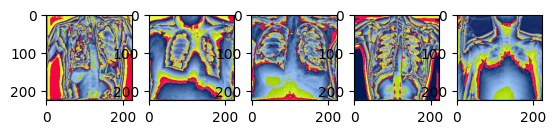

In [ ]:
f, axarr = plt.subplots(1,5)
toPIL = transforms.ToPILImage()
axarr[0].imshow(toPIL(train_dataset[0][0]))
axarr[1].imshow(toPIL(train_dataset[1][0]))
axarr[2].imshow(toPIL(train_dataset[2][0]))
axarr[3].imshow(toPIL(train_dataset[3][0]))
axarr[4].imshow(toPIL(train_dataset[4][0]))

In [ ]:
# Function to Unfreeze a Specific Number of Layers from the End
def unfreeze_layers(model, num_layers_to_unfreeze):
    child_counter = 0
    children_list = list(model.children())
    num_children = len(children_list)

    # Reverse the children list to start from the last layer
    children_list = list(reversed(children_list))

    # Unfreeze layers from the end
    for child in children_list:
        if child_counter < num_layers_to_unfreeze:
            for param in child.parameters():
                param.requires_grad = True
            child_counter += 1
        else:
            break


# Function to Load and Modify ResNet-18
def load_resnet101(num_classes, num_unfrozen_layers):
    model = models.resnet101(pretrained=True)

    # Freeze all layers initially
    for param in model.parameters():
        param.requires_grad = False

    # Unfreeze the specified number of layers from the end
    unfreeze_layers(model, num_unfrozen_layers)

    # Modify the final fully connected layer
    #num_ftrs = model.fc.in_features
    #model.fc = nn.Linear(num_ftrs, num_classes)
    model.fc = nn.Sequential(
    #nn.Linear(resnet.fc.in_features, 256),  # Add a new fully connected layer
    #nn.ReLU(),  # Apply ReLU activation
    #nn.Linear(256, num_classes),  # Final output layer for multi-class classification
    nn.Linear(model.fc.in_features, num_classes)
    )

    return model


In [ ]:
# Training Function with Early Stopping
train_losses = []
val_losses = []
val_dataset = test_dataset
# Create DataLoader instances for training and testing
train_dataloader = DataLoader(train_dataset, batch_size=64, shuffle=True)
# val_dataloader = DataLoader(val_dataset, batch_size=256, shuffle=False)
test_dataloader = DataLoader(test_dataset, batch_size=64, shuffle=False)
print(len(train_dataset))

def train_model(model, criterion, weighted_criterion, optimizer, num_epochs=5, early_stopping_patience=3):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    print(f"Running on device: {device}")  # Print the device information
    model.to(device)
    val_dataloader = DataLoader(val_dataset, batch_size=64, shuffle=False)
    best_val_loss = float('inf')
    epochs_no_improve = 0
    for epoch in range(num_epochs):
        # Training phase
        model.train()
        train_loss = 0.0
        train_dataloader = DataLoader(train_dataset, batch_size=64, shuffle=True)
        for inputs, labels in train_dataloader:
            inputs, labels = inputs.to(device), labels.to(device)
            #print("We are here.....1")
            optimizer.zero_grad()
            outputs = model(inputs)
            #print("We are here.....2")
            #print(len(outputs[0]))
            #print(outputs[0].dtype)
            #print(labels[0].dtype)
            loss = weighted_criterion(outputs, labels)
            #print("We are here.....3")
            loss.backward()
            optimizer.step()
            train_loss += loss.item()
        average_train_loss = train_loss / len(train_dataloader)
        train_losses.append(average_train_loss)

        # Validation phase
        model.eval()
        val_loss = 0.0
        with torch.no_grad():
            for inputs, labels in val_dataloader:
                inputs, labels = inputs.to(device), labels.to(device)
                outputs = model(inputs)
                loss = criterion(outputs, labels)
                val_loss += loss.item()

        val_loss /= len(val_dataloader)
        print(f'Epoch {epoch+1}/{num_epochs}, Training Loss: {average_train_loss:.4f}, Validation Loss: {val_loss:.4f}')
        val_losses.append(val_loss)
        # Early stopping
        # if val_loss < best_val_loss:
        #     best_val_loss = val_loss
        #     epochs_no_improve = 0
        # else:
        #     epochs_no_improve += 1
        #     if epochs_no_improve == early_stopping_patience:
        #         print('Early stopping triggered')
        #         break

    print('Training complete')
    return model


6390


In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
num_classes = len(diseases)
freq = np.zeros(num_classes)

for freq_images_batch, freq_labels_batch in train_dataloader:
    for col1 in range(num_classes):
        class_count = freq_labels_batch[:, col1].sum().item()
        freq[col1] += class_count

total_samples = np.sum(freq)
class_weights = [total_samples / (len(freq) * freq_val) for freq_val in freq]
class_weights = torch.tensor(class_weights, dtype=torch.float32)

# Normalize class weights to sum up to 1.0
class_weights /= class_weights.sum()
class_weights = class_weights.to(device)

In [ ]:
# Setup for Training with Variable Learning Rate and Layers
# n_classes = len(unique_train_classes)  # Replace with your number of classes
num_unfrozen_layers = 5  # Choose the number of layers to unfreeze
learning_rate = 0.00003    # Set your learning rate
num_classes = len(diseases)
n_classes = num_classes
#print(n_classes)
#dataloaders = {'train': train_dataloader, 'val': val_dataloader}
model_ft = load_resnet101(num_classes, num_unfrozen_layers)
optimizer_ft = optim.Adam(filter(lambda p: p.requires_grad, model_ft.parameters()), lr=learning_rate)
#optimizer_ft = optim.Adam(model.fc.parameters(), lr=learning_rate)  # Optimizer for the final layer
criterion = nn.BCEWithLogitsLoss()  # Golden criterion.
#Trying using class weightage techniques to avoid class imbalance issues
weighted_criterion = nn.BCEWithLogitsLoss(weight=class_weights)

num_epochs = 6
early_stopping_patience = 1
# if hasattr(model_ft, 'fc'):
#     for param in model_ft.fc.parameters():
#         print(f'Requires_grad: {param.requires_grad}')
for name, param in model_ft.named_parameters():
    print(f'Parameter: {name}, requires_grad: {param.requires_grad}')

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet101_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet101_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Parameter: conv1.weight, requires_grad: False
Parameter: bn1.weight, requires_grad: False
Parameter: bn1.bias, requires_grad: False
Parameter: layer1.0.conv1.weight, requires_grad: False
Parameter: layer1.0.bn1.weight, requires_grad: False
Parameter: layer1.0.bn1.bias, requires_grad: False
Parameter: layer1.0.conv2.weight, requires_grad: False
Parameter: layer1.0.bn2.weight, requires_grad: False
Parameter: layer1.0.bn2.bias, requires_grad: False
Parameter: layer1.0.conv3.weight, requires_grad: False
Parameter: layer1.0.bn3.weight, requires_grad: False
Parameter: layer1.0.bn3.bias, requires_grad: False
Parameter: layer1.0.downsample.0.weight, requires_grad: False
Parameter: layer1.0.downsample.1.weight, requires_grad: False
Parameter: layer1.0.downsample.1.bias, requires_grad: False
Parameter: layer1.1.conv1.weight, requires_grad: False
Parameter: layer1.1.bn1.weight, requires_grad: False
Parameter: layer1.1.bn1.bias, requires_grad: False
Parameter: layer1.1.conv2.weight, requires_grad:

In [ ]:
start_time = time.time()
model_ft = train_model(model_ft, criterion, weighted_criterion, optimizer_ft, num_epochs=num_epochs, early_stopping_patience=early_stopping_patience)

Running on device: cuda
Epoch 1/6, Training Loss: 0.0556, Validation Loss: 0.3764
Epoch 2/6, Training Loss: 0.0304, Validation Loss: 0.3372
Epoch 3/6, Training Loss: 0.0206, Validation Loss: 0.3287
Epoch 4/6, Training Loss: 0.0124, Validation Loss: 0.3351
Epoch 5/6, Training Loss: 0.0064, Validation Loss: 0.3490
Epoch 6/6, Training Loss: 0.0039, Validation Loss: 0.3572
Training complete


In [ ]:
end_time = time.time()
elapsed_time = end_time - start_time
print(f"Elapsed time: {elapsed_time} seconds")


Elapsed time: 575.558290719986 seconds


6


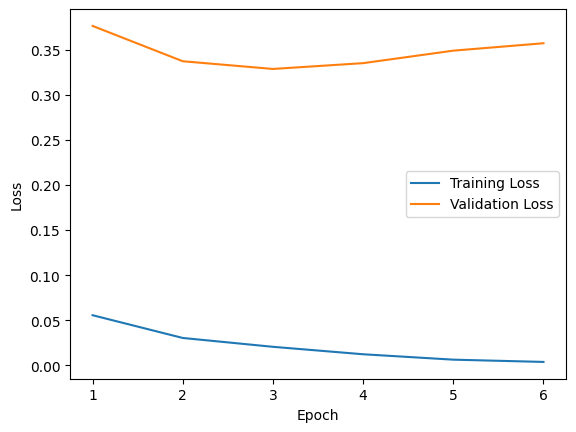

In [ ]:
print(len(train_losses))
# Plot the training curve
num_epochs_run = len(train_losses)
plt.plot(range(1, num_epochs_run + 1), train_losses, label='Training Loss')
plt.plot(range(1, num_epochs_run + 1), val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()